In [1]:
# 1. Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 2. Titanic-Datensatz laden
df = sns.load_dataset('titanic')

In [4]:
# 3. Erste Datenübersicht
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [6]:
grouped_data = df.groupby(['embark_town', 'survived']).size().unstack(fill_value=0)

grouped_data

survived,0,1
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


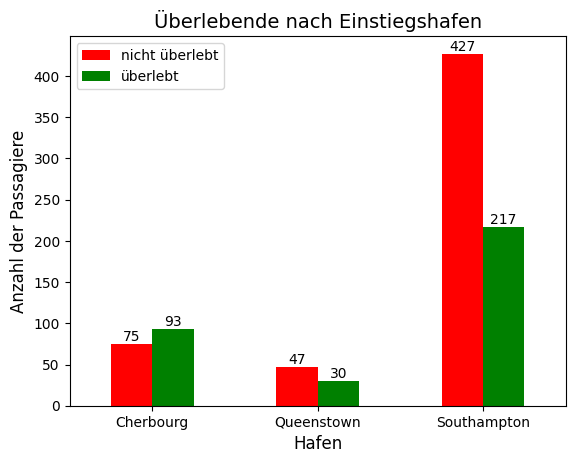

In [7]:
grouped_data = df.groupby(['embark_town', 'survived']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', color=['red', 'green'])    # stacked=True (gestapeltes Balkendiagramm) auch möglich

# Zahlen auf den Balken anzeigen
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=10)
ax.bar_label(ax.containers[1], label_type='edge', color='black', fontsize=10)

ax.set_title('Überlebende nach Einstiegshafen', fontsize=14)
ax.set_xlabel('Hafen', fontsize=12)
ax.set_ylabel('Anzahl der Passagiere', fontsize=12)
plt.legend(['nicht überlebt', 'überlebt'], facecolor='white')
plt.xticks(rotation=0)

plt.show()

In [8]:
grouped_data = df.groupby(['embark_town', 'sex'])['survived'].mean().unstack()

grouped_data

# im Tortendiagramm aber andere Werte

sex,female,male
embark_town,,
Cherbourg,0.876712,0.305263
Queenstown,0.750000,0.073171
Southampton,0.689655,0.174603


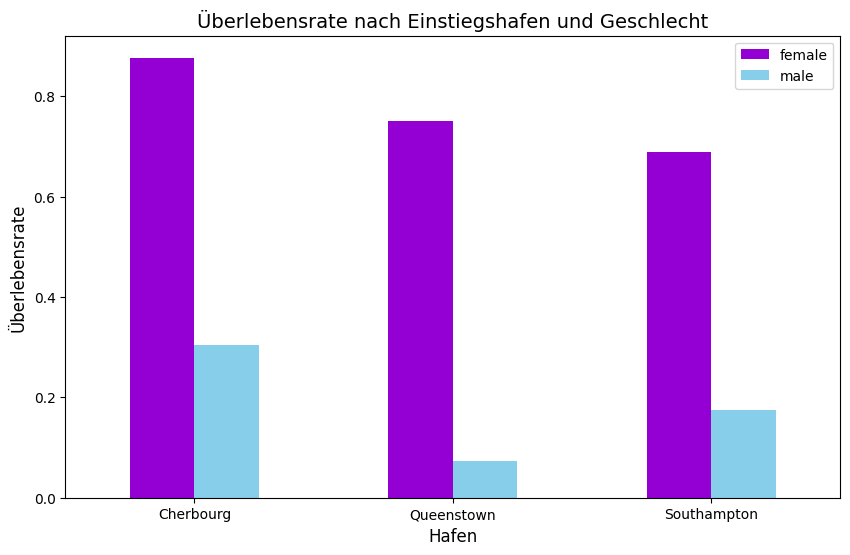

In [9]:
grouped_data = df.groupby(['embark_town', 'sex'])['survived'].mean().unstack()

grouped_data.plot(kind='bar', color=['darkviolet', 'skyblue'], figsize=(10, 6))

plt.title('Überlebensrate nach Einstiegshafen und Geschlecht', fontsize=14)
plt.xlabel('Hafen', fontsize=12)
plt.ylabel('Überlebensrate', fontsize=12)
plt.legend(facecolor='white')
plt.xticks(rotation=0)

plt.show()

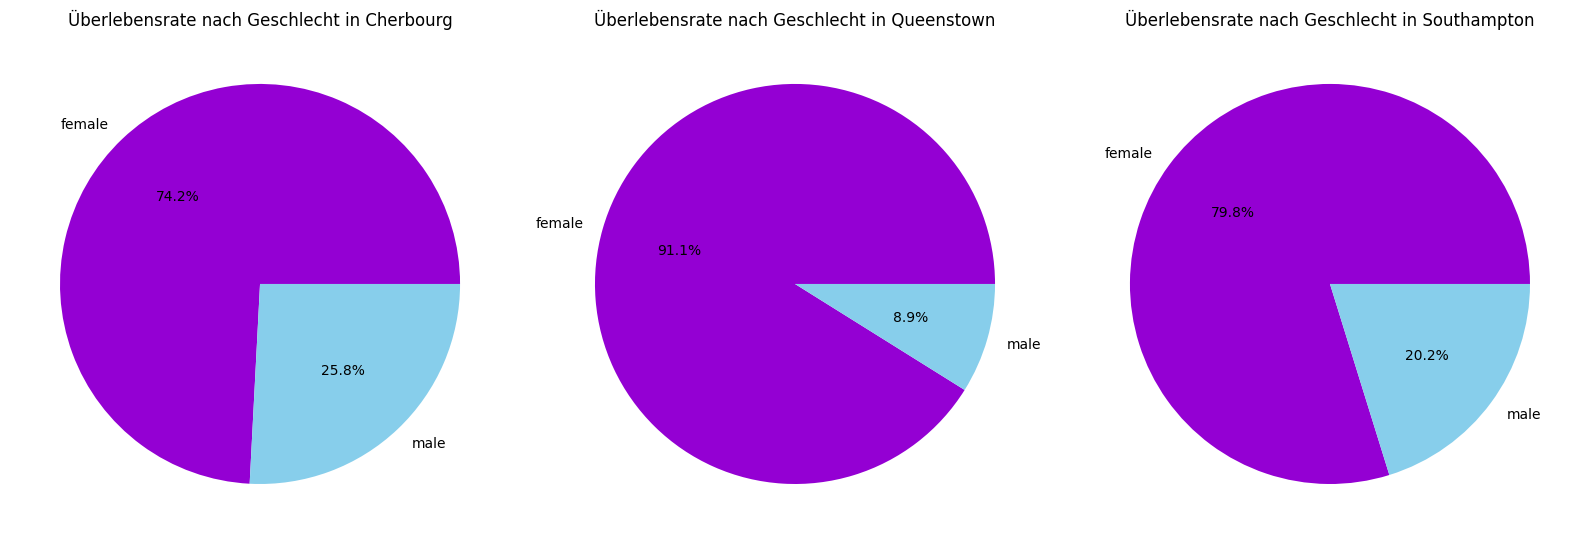

In [10]:
grouped_data = df.groupby(['embark_town', 'sex'])['survived'].mean().unstack()

cherbourg_data = grouped_data.loc['Cherbourg']  # für Cherbourg
queenstown_data = grouped_data.loc['Queenstown'] # für Queenstown
southampton_data = grouped_data.loc['Southampton']  # für Southampton

# Erstelle das Kreisdiagramm für 3 Städte nebeneinander
fig, ax = plt.subplots(1, 3, figsize=(16, 8))  # Drei Subplots nebeneinander

# Kreisdiagramm für Cherbourg
cherbourg_data.plot(kind='pie', autopct='%1.1f%%', colors=['darkviolet', 'skyblue'], ax=ax[0], title='Überlebensrate nach Geschlecht in Cherbourg', ylabel='')
# Kreisdiagramm für Queenstown
queenstown_data.plot(kind='pie', autopct='%1.1f%%', colors=['darkviolet', 'skyblue'], ax=ax[1], title='Überlebensrate nach Geschlecht in Queenstown', ylabel='')
# Kreisdiagramm für Southampton
southampton_data.plot(kind='pie', autopct='%1.1f%%', colors=['darkviolet', 'skyblue'], ax=ax[2], title='Überlebensrate nach Geschlecht in Southampton', ylabel='')

plt.tight_layout()  # Passt den Abstand zwischen den Diagrammen an
plt.show()

In [11]:
grouped_data = df.groupby(['embark_town', 'sex'])['survived'].value_counts().unstack()  # oder sum()???

grouped_data

survived              0    1
embark_town sex             
Cherbourg   female    9   64
            male     66   29
Queenstown  female    9   27
            male     38    3
Southampton female   63  140
            male    364   77

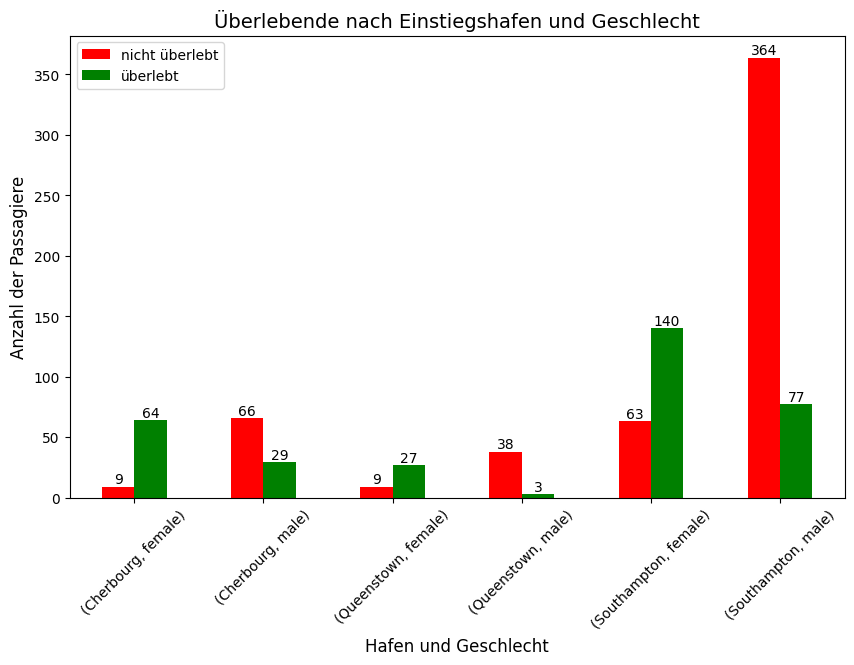

In [12]:
grouped_data = df.groupby(['embark_town', 'sex'])['survived'].value_counts().unstack()  # oder sum()???

ax = grouped_data.plot(kind='bar', color=['red', 'green'], figsize=(10, 6))     # female&male: 'darkviolet', 'skyblue'

# Zahlen auf den Balken anzeigen
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=10)
ax.bar_label(ax.containers[1], label_type='edge', color='black', fontsize=10)

ax.set_title('Überlebende nach Einstiegshafen und Geschlecht', fontsize=14)
ax.set_xlabel('Hafen und Geschlecht', fontsize=12)
ax.set_ylabel('Anzahl der Passagiere', fontsize=12)
plt.legend(['nicht überlebt', 'überlebt'], facecolor='white')
#plt.legend(['female', 'male'], facecolor='white')
plt.xticks(rotation=45)

plt.show()

In [13]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

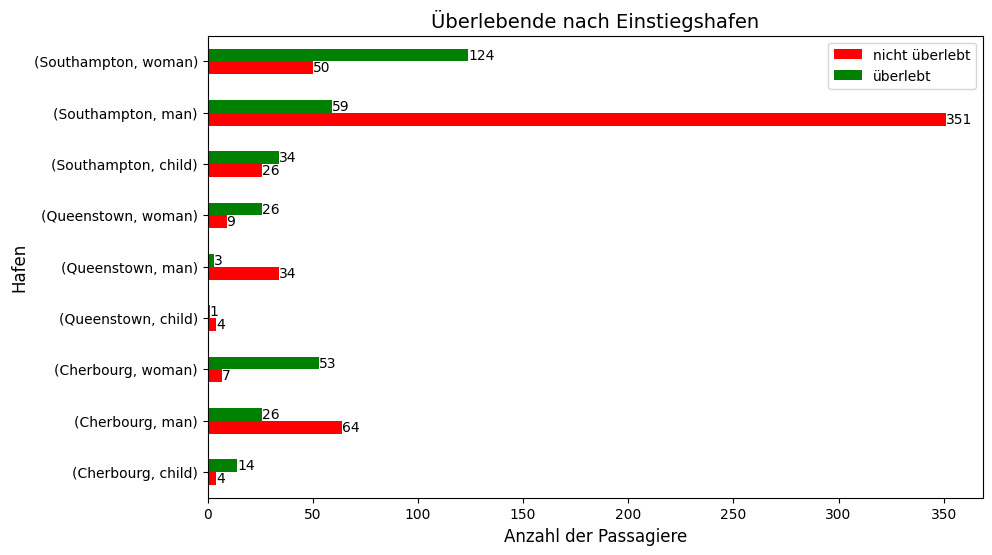

In [14]:
grouped_data = df.groupby(['embark_town', 'who'])['survived'].value_counts().unstack()   # oder sum()??

ax = grouped_data.plot(kind='barh', color=['red', 'green'], figsize=(10, 6))

# Zahlen auf den Balken anzeigen
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=10)
ax.bar_label(ax.containers[1], label_type='edge', color='black', fontsize=10)

ax.set_title('Überlebende nach Einstiegshafen', fontsize=14)
ax.set_ylabel('Hafen', fontsize=12)
ax.set_xlabel('Anzahl der Passagiere', fontsize=12)
plt.legend(['nicht überlebt', 'überlebt'], facecolor='white')
plt.xticks(rotation=0)

plt.show()

In [15]:
grouped_data = df.groupby(['embark_town', 'who'])['survived'].mean().unstack()

grouped_data

who,child,man,woman
embark_town,,,
Cherbourg,0.777778,0.288889,0.883333
Queenstown,0.200000,0.081081,0.742857
Southampton,0.566667,0.143902,0.712644


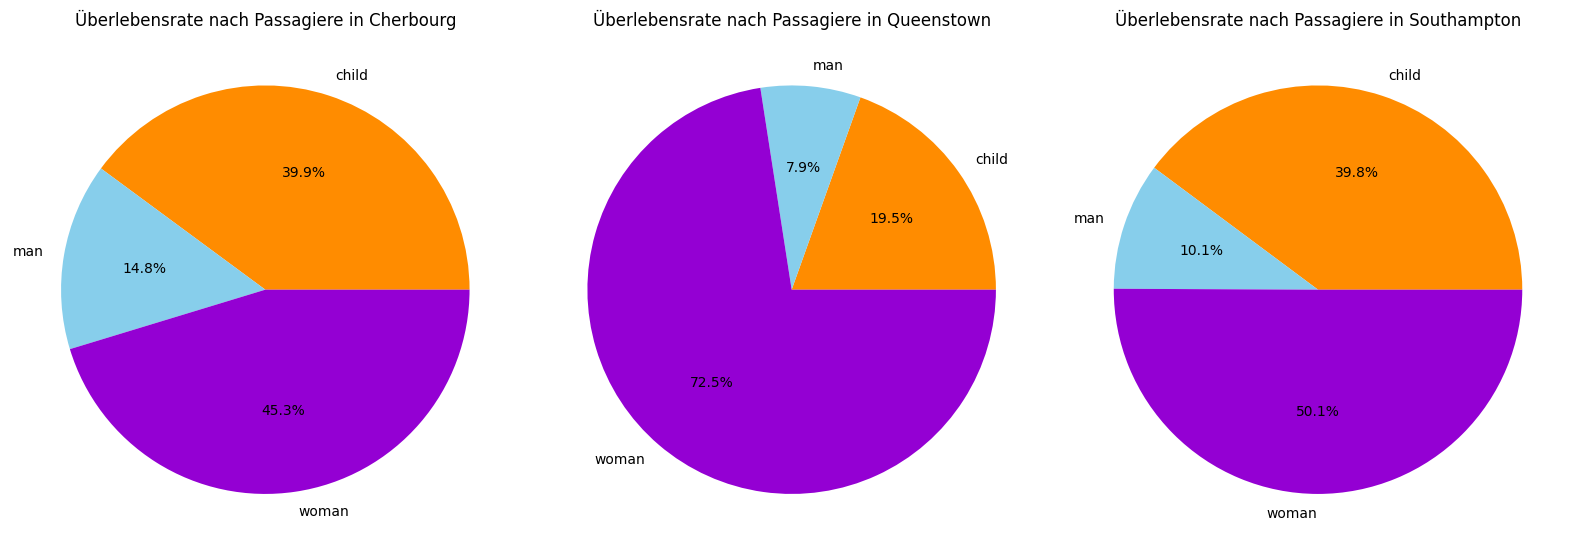

In [16]:
grouped_data = df.groupby(['embark_town', 'who'])['survived'].mean().unstack()

cherbourg_data = grouped_data.loc['Cherbourg']  # für Cherbourg
queenstown_data = grouped_data.loc['Queenstown'] # für Queenstown
southampton_data = grouped_data.loc['Southampton']  # für Southampton

# Erstelle das Kreisdiagramm für 3 Städte nebeneinander
fig, ax = plt.subplots(1, 3, figsize=(16, 8))  # Drei Subplots nebeneinander

# Kreisdiagramm für Cherbourg
cherbourg_data.plot(kind='pie', autopct='%1.1f%%', colors=['darkorange', 'skyblue', 'darkviolet'], ax=ax[0], title='Überlebensrate nach Passagiere in Cherbourg', ylabel='')
# Kreisdiagramm für Queenstown
queenstown_data.plot(kind='pie', autopct='%1.1f%%', colors=['darkorange', 'skyblue', 'darkviolet'], ax=ax[1], title='Überlebensrate nach Passagiere in Queenstown', ylabel='')
# Kreisdiagramm für Southampton
southampton_data.plot(kind='pie', autopct='%1.1f%%', colors=['darkorange', 'skyblue', 'darkviolet'], ax=ax[2], title='Überlebensrate nach Passagiere in Southampton', ylabel='')

plt.tight_layout()  # Passt den Abstand zwischen den Diagrammen an
plt.show()

In [17]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
grouped_data = df.groupby(['embark_town', 'pclass'])['survived'].value_counts().unstack()    # oder sum()??

grouped_data

survived              0   1
embark_town pclass         
Cherbourg   1        26  59
            2         8   9
            3        41  25
Queenstown  1         1   1
            2         1   2
            3        45  27
Southampton 1        53  74
            2        88  76
            3       286  67

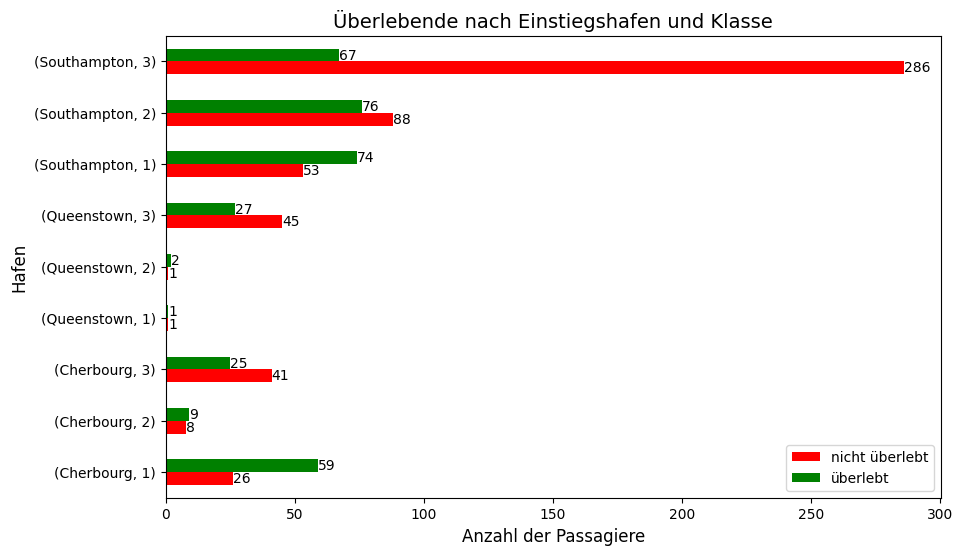

In [19]:
grouped_data = df.groupby(['embark_town', 'pclass'])['survived'].value_counts().unstack()

ax = grouped_data.plot(kind='barh', color=['red', 'green'], figsize=(10, 6))

# Zahlen auf den Balken anzeigen
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=10)
ax.bar_label(ax.containers[1], label_type='edge', color='black', fontsize=10)

ax.set_title('Überlebende nach Einstiegshafen und Klasse', fontsize=14)
ax.set_ylabel('Hafen', fontsize=12)
ax.set_xlabel('Anzahl der Passagiere', fontsize=12)
plt.legend(['nicht überlebt', 'überlebt'], facecolor='white')
plt.xticks(rotation=0)

plt.show()

In [20]:
grouped_data = df.groupby(['embark_town', 'pclass'])['survived'].mean().unstack()

grouped_data

pclass,1,2,3
embark_town,,,
Cherbourg,0.694118,0.529412,0.378788
Queenstown,0.500000,0.666667,0.375000
Southampton,0.582677,0.463415,0.189802


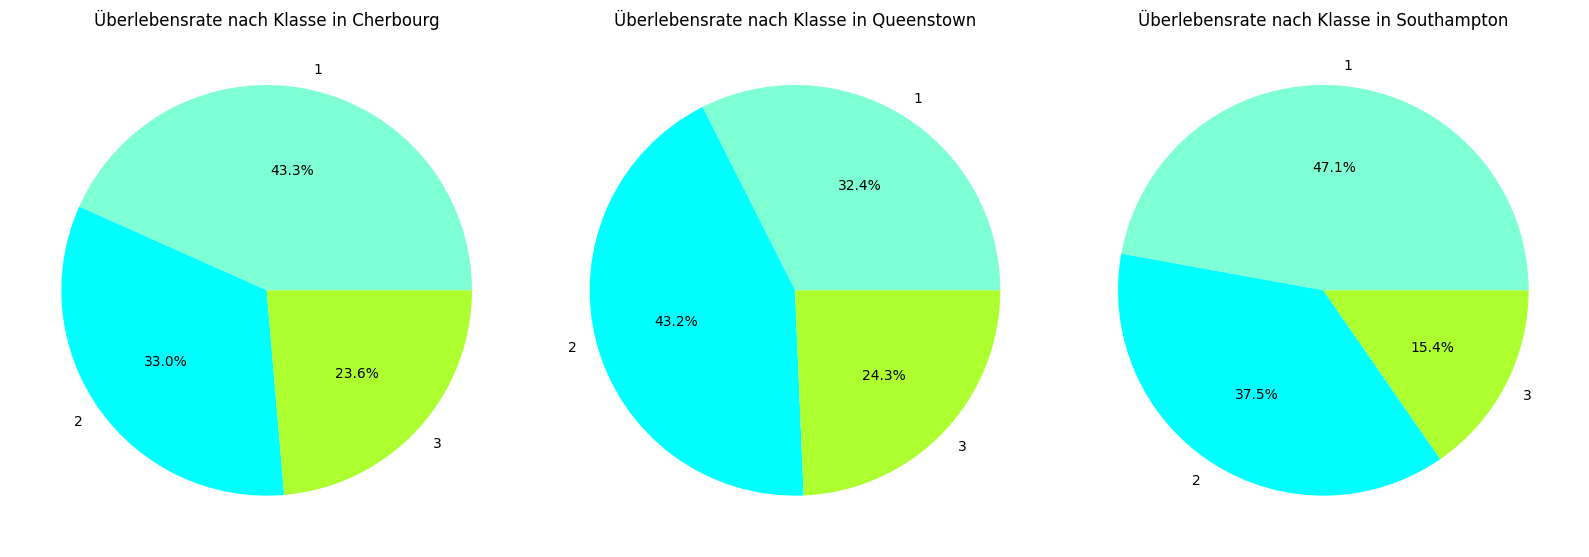

In [21]:
grouped_data = df.groupby(['embark_town', 'pclass'])['survived'].mean().unstack()

cherbourg_data = grouped_data.loc['Cherbourg']  # für Cherbourg
queenstown_data = grouped_data.loc['Queenstown'] # für Queenstown
southampton_data = grouped_data.loc['Southampton']  # für Southampton

# Erstelle das Kreisdiagramm für 3 Städte nebeneinander
fig, ax = plt.subplots(1, 3, figsize=(16, 8))  # Drei Subplots nebeneinander

# Kreisdiagramm für Cherbourg
cherbourg_data.plot(kind='pie', autopct='%1.1f%%', colors=['aquamarine', 'cyan', 'greenyellow'], ax=ax[0], title='Überlebensrate nach Klasse in Cherbourg', ylabel='')
# Kreisdiagramm für Queenstown
queenstown_data.plot(kind='pie', autopct='%1.1f%%', colors=['aquamarine', 'cyan', 'greenyellow'], ax=ax[1], title='Überlebensrate nach Klasse in Queenstown', ylabel='')
# Kreisdiagramm für Southampton
southampton_data.plot(kind='pie', autopct='%1.1f%%', colors=['aquamarine', 'cyan', 'greenyellow'], ax=ax[2], title='Überlebensrate nach Klasse in Southampton', ylabel='')

plt.tight_layout()  # Passt den Abstand zwischen den Diagrammen an
plt.show()

In [22]:
# Altersgruppen erstellen
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 30, 40, 50, 60, 80], labels=['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '61+'])

In [23]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19-30
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,19-30
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,19-30
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19-30
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,19-30


In [24]:
grouped_data = df.groupby('embark_town')['age_group'].value_counts().unstack()

grouped_data

age_group,0-12,13-18,19-30,31-40,41-50,51-60,61+
embark_town,,,,,,,
Cherbourg,11,17,46,25,16,12,3
Queenstown,4,4,8,7,2,1,2
Southampton,54,49,216,122,68,29,16


In [25]:
grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].value_counts().unstack(fill_value=0) # Formatiert die Daten in eine Matrixform und
                                                                                                        # füllt die fehlenden Werte mit 0, was bedeutet,
                                                                                                        # dass für Kombinationen von embark_town und age
                                                                                                        # ohne survived-Einträge eine 0 gesetzt wird.
grouped_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\857079984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].value_counts().unstack(fill_value=0) # Formatiert die Daten in eine Matrixform und


survived                 0   1
embark_town age_group         
Cherbourg   0-12         2   9
            13-18        6  11
            19-30       19  27
            31-40       11  14
            41-50        6  10
            51-60        4   8
            61+          3   0
Queenstown  0-12         4   0
            13-18        1   3
            19-30        4   4
            31-40        6   1
            41-50        2   0
            51-60        1   0
            61+          2   0
Southampton 0-12        23  31
            13-18       33  16
            19-30      151  65
            31-40       69  53
            41-50       45  23
            51-60       20   9
            61+         12   4

C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\1014535955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].value_counts().unstack(fill_value=0) # oder sum()???


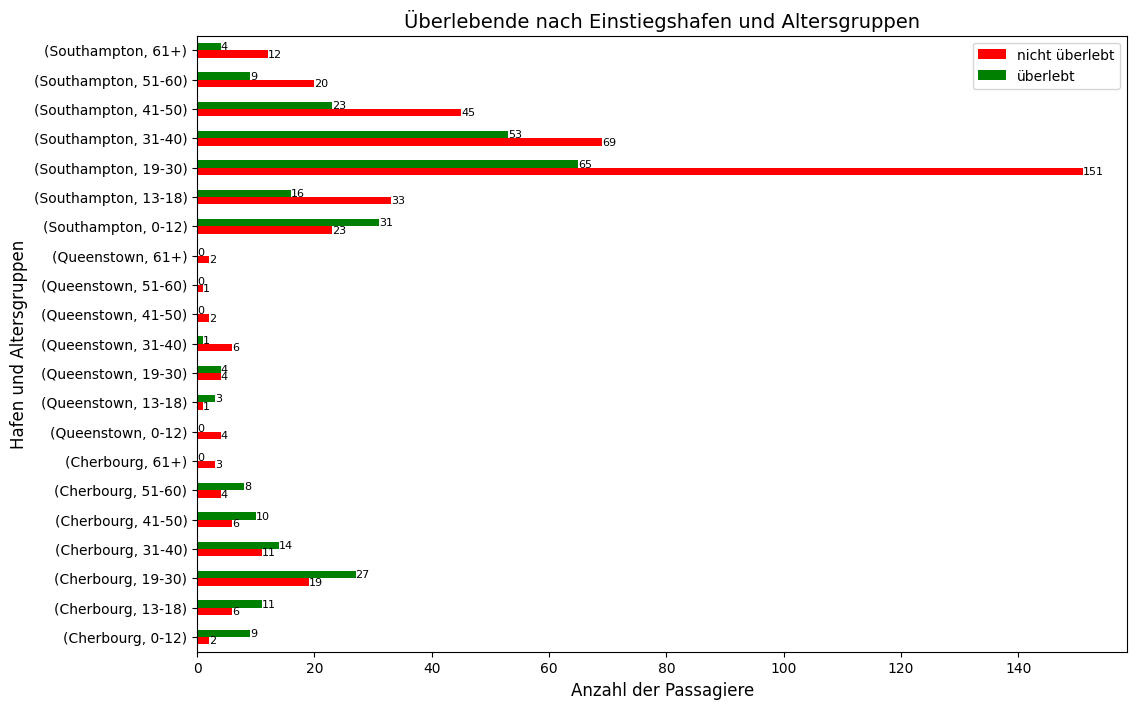

In [26]:
grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].value_counts().unstack(fill_value=0) # oder sum()???

ax = grouped_data.plot(kind='barh', stacked=False, color=['red', 'green'], figsize=(12, 8))

# Zahlen auf den Balken anzeigen
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=8)
ax.bar_label(ax.containers[1], label_type='edge', color='black', fontsize=8)

ax.set_title('Überlebende nach Einstiegshafen und Altersgruppen', fontsize=14)
ax.set_ylabel('Hafen und Altersgruppen', fontsize=12)
ax.set_xlabel('Anzahl der Passagiere', fontsize=12)
plt.legend(['nicht überlebt', 'überlebt'], facecolor='white')
plt.xticks(rotation=0)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\3963045103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].value_counts().unstack(fill_value=0)


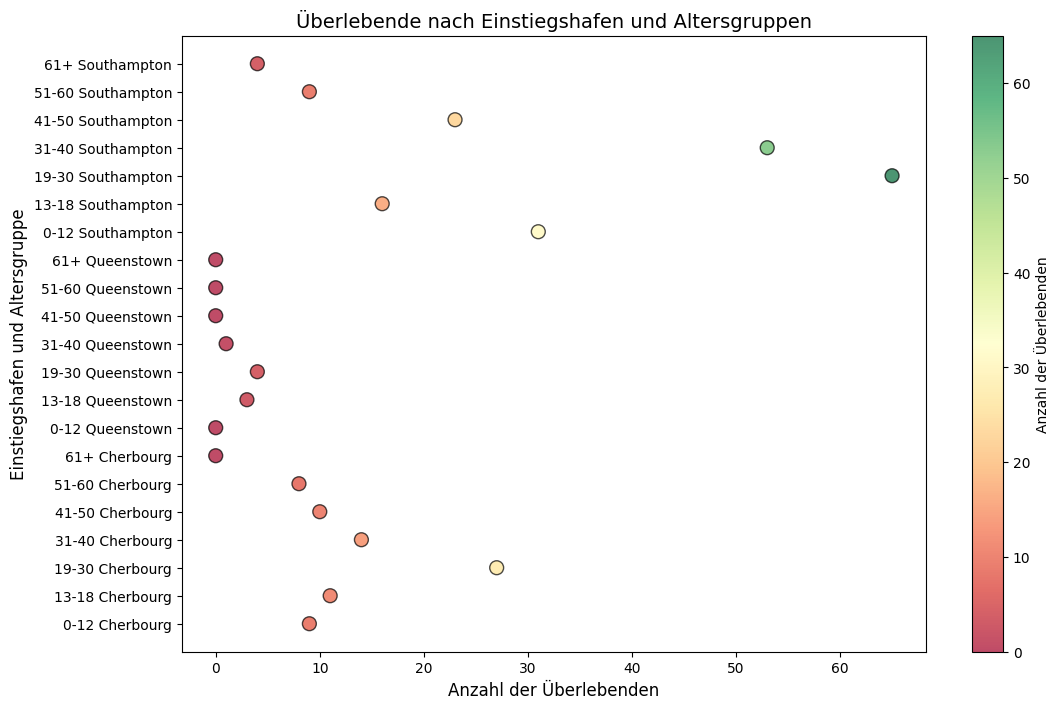

In [27]:
grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].value_counts().unstack(fill_value=0)

grouped_data['survived'] = grouped_data[1]  # Überlebende (survived == 1) in eine eigene Spalte

# Kombiniere 'embark_town' und 'age_group' für die Y-Achse
grouped_data['age_group_embark_town'] = grouped_data.index.map(lambda x: f"{x[1]} {x[0]}")

# Scatterplot erstellen
plt.figure(figsize=(12, 8))

# Plot: 'survived' (Überlebende) auf der X-Achse und 'age_group' + 'embark_town' auf der Y-Achse
plt.scatter(grouped_data['survived'], grouped_data['age_group_embark_town'], 
            c=grouped_data['survived'], cmap='RdYlGn', s=100, edgecolors='k', alpha=0.7)

plt.title('Überlebende nach Einstiegshafen und Altersgruppen', fontsize=14)
plt.xlabel('Anzahl der Überlebenden', fontsize=12)
plt.ylabel('Einstiegshafen und Altersgruppe', fontsize=12)

# Farbskala (für 'überlebt' oder 'nicht überlebt')
plt.colorbar(label='Anzahl der Überlebenden')

plt.xticks(rotation=0)
plt.show()

In [28]:
grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].mean().unstack().round(2)

grouped_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\2431434268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].mean().unstack().round(2)


age_group,0-12,13-18,19-30,31-40,41-50,51-60,61+
embark_town,,,,,,,
Cherbourg,0.82,0.65,0.59,0.56,0.62,0.67,0.00
Queenstown,0.00,0.75,0.50,0.14,0.00,0.00,0.00
Southampton,0.57,0.33,0.30,0.43,0.34,0.31,0.25


C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\1450086557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].mean().unstack().round(2)


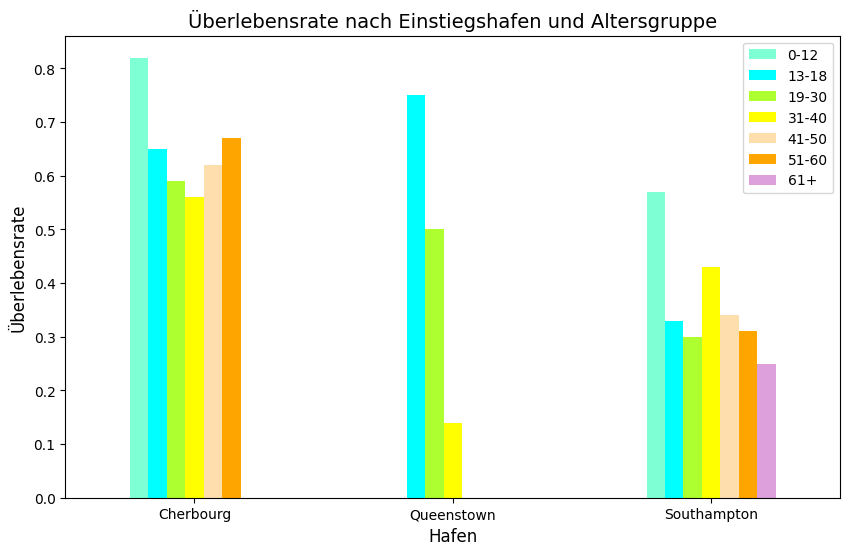

In [29]:
grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].mean().unstack().round(2)

grouped_data.plot(kind='bar', color=['aquamarine', 'cyan', 'greenyellow', 'yellow', 'navajowhite', 'orange', 'plum'], figsize=(10, 6))

plt.title('Überlebensrate nach Einstiegshafen und Altersgruppe', fontsize=14)
plt.xlabel('Hafen', fontsize=12)
plt.ylabel('Überlebensrate', fontsize=12)
plt.legend(facecolor='white')
plt.xticks(rotation=0)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\1497533357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].mean().unstack()


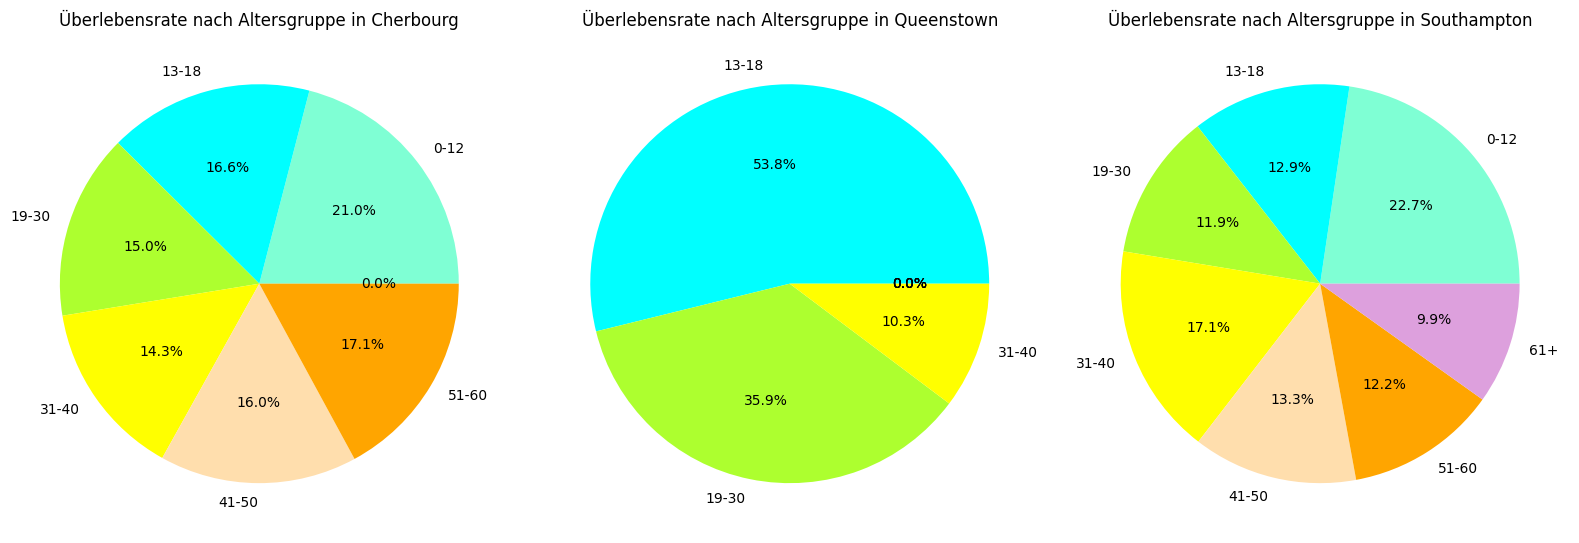

In [30]:
grouped_data = df.groupby(['embark_town', 'age_group'])['survived'].mean().unstack()

cherbourg_data = grouped_data.loc['Cherbourg']  # für Cherbourg
queenstown_data = grouped_data.loc['Queenstown'] # für Queenstown
southampton_data = grouped_data.loc['Southampton']  # für Southampton

# Erstelle das Kreisdiagramm für 3 Städte nebeneinander
fig, ax = plt.subplots(1, 3, figsize=(16, 8))  # Drei Subplots nebeneinander

# Kreisdiagramm für Cherbourg
cherbourg_data.plot(kind='pie', autopct='%1.1f%%', colors=['aquamarine', 'cyan', 'greenyellow', 'yellow', 'navajowhite', 'orange', 'plum'], ax=ax[0], title='Überlebensrate nach Altersgruppe in Cherbourg', ylabel='')
# Kreisdiagramm für Queenstown
queenstown_data.plot(kind='pie', autopct='%1.1f%%', colors=['aquamarine', 'cyan', 'greenyellow', 'yellow', 'navajowhite', 'orange', 'plum'], ax=ax[1], title='Überlebensrate nach Altersgruppe in Queenstown', ylabel='')
# Kreisdiagramm für Southampton
southampton_data.plot(kind='pie', autopct='%1.1f%%', colors=['aquamarine', 'cyan', 'greenyellow', 'yellow', 'navajowhite', 'orange', 'plum'], ax=ax[2], title='Überlebensrate nach Altersgruppe in Southampton', ylabel='')

plt.tight_layout()  # Passt den Abstand zwischen den Diagrammen an
plt.show()